<a href="https://colab.research.google.com/github/vivektt27/Hotel-Booking/blob/main/TEAM_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

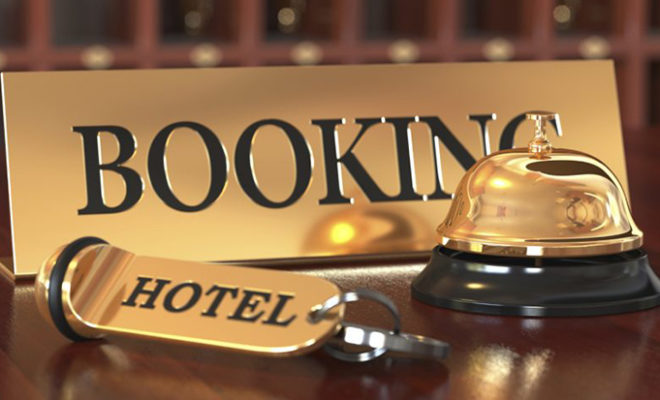

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
# Mounting Drive

from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading CSV File


df= pd.read_csv('/content/drive/MyDrive/Almabetter/capstone Project/Hotel_Booking EDA/DATA SET/Hotel Bookings.csv')


In [ ]:
# Taking a look to Data                                                                    

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# finding number of Rows & Column 

df.shape

(119390, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# let's see columns

df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# types of columns

df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
# Missing Values

df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
# Numerical Data

df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# categorical Data

df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [ ]:
# Data Cleaning to Removes null Values

df["children"] = df["children"].fillna(0)
df["country"] = df["country"].fillna("Undefined")
df["agent"] = df["agent"].fillna(0)
df["company"] = df["company"].fillna(0)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Now, look for unique values in each Columns

print ('Hotel                  :', df.hotel.unique())
print ('\nYear                 :', df.arrival_date_year.unique())
print ('\nMonth                :',df.arrival_date_month.unique())
print ('\nMeal                 :', df.meal.unique())
print ('\nCountry              :', df.country.unique())
print ('\nMarket Segment       :', df.market_segment.unique())
print ('\nDistribution Channel :', df.distribution_channel.unique())
print ('\nReserved Room Type   :', df.reserved_room_type.unique())
print ('\nAssigned Room Type   :', df.assigned_room_type.unique())
print ('\nDeposit Type         :', df.deposit_type.unique())
print ('\nCustomer Type        :', df.customer_type.unique())
print ('\nReservation Status   :', df.reservation_status.unique())

Hotel                  : ['Resort Hotel' 'City Hotel']

Year                 : [2015 2016 2017]

Month                : ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

Meal                 : ['BB' 'FB' 'HB' 'SC' 'Undefined']

Country              : ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'Undefined' 'ROU' 'NOR' 'OMN' 'ARG'
 'POL' 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS'
 'EST' 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX'
 'MAR' 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF'
 'AGO' 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN'
 'JAM' 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL'
 'GGY' 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL'
 'SEN' 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA'
 'CUB' 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP'
 'BDI' 'SAU' 'VNM' 'PLW' 'QAT

In [ ]:

#  Replacing 1's and 0's with "YES" AND " NO" in Columns [is_canceled & is_repeated_guest]


df["is_canceled"] = df["is_canceled"].replace({1:"Yes", 0:"No"})
df["is_repeated_guest"] = df["is_repeated_guest"].replace({1:"Yes", 0:"No"})
print(df.is_canceled.unique())
print(df.is_repeated_guest.unique())

['No' 'Yes']
['No' 'Yes']


### **EXPLORATORY DATA ANALYSIS**

**SOME STRAIGHT FORWORD QUESTIONS BELOW**

**Which type of  hotels have maximum number of bookings ?**

In [ ]:
df.hotel.value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)

In [ ]:
max_hotel_booking = df["hotel"].value_counts()

Text(0.5, 0, 'hotel types')

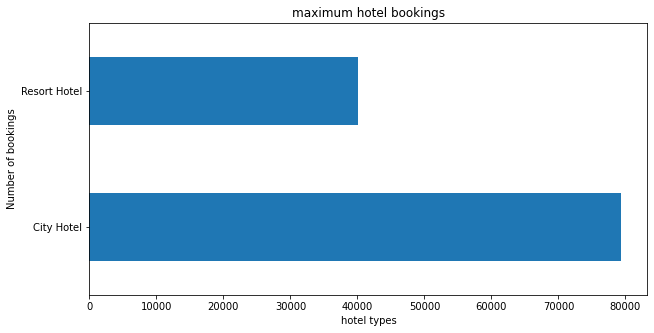

In [ ]:
max_hotel_booking.plot(kind="barh")
plt.title('maximum hotel bookings')
plt.ylabel('Number of bookings')
plt.xlabel('hotel types')

the city hotels have maximum number of bookings 

                                                                        .................

**which hotel have maximum number of cancellation of bookings ?**


In [ ]:
df.groupby(["hotel"])["is_canceled"].agg(["value_counts"])

value_counts
hotel        is_canceled              
City Hotel   No                  46228
             Yes                 33102
Resort Hotel No                  28938
             Yes                 11122

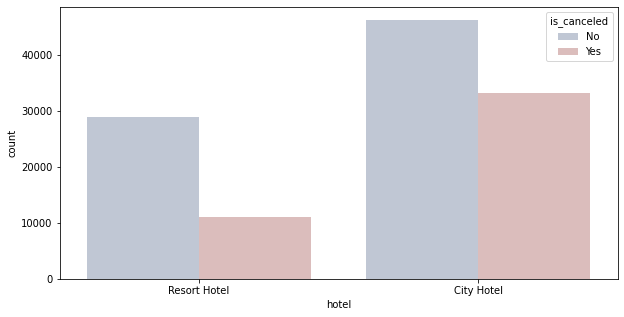

In [ ]:
sns.countplot(x = "hotel", hue = "is_canceled", data = df,palette='vlag')

the city hotels has maximum number of cancellation of bookings 

                                                                        .................

**Find the Count of previous cancellations per year in each hotel ?**

In [ ]:
df.groupby(["hotel", "arrival_date_year"])["previous_cancellations"].agg(["value_counts"])

value_counts
hotel        arrival_date_year previous_cancellations              
City Hotel   2015              0                               9980
                               1                               3684
                               2                                 15
                               11                                 2
                               21                                 1
             2016              0                              36645
                               1                               1338
                               3                                 47
                               2                                 37
                               11                                33
                               13                                12
                               5                                 11
                               4                                 10
                               6                                  7
             2017              0                              27316
                               1                                133
                               2                                 20
                               4                                 15
                               6                                 15
                               5                                  5
                               3                                  4
Resort Hotel 2015              0                               7581
                               1                                577
                               24                                48
                               26                                26
                               25                                25
                               19                                19
                               2                                 16
                               14                                14
                               3                                  8
             2016              0                              18291
                               1                                257
                               2                                 11
                               3                                  4
                               4                                  2
                               5                                  2
             2017              0                              13093
                               1                                 62
                               2                                 17
                               4                                  4
                               3                                  2
                               5                                  1

**Find the Count of previous bookings which are not canceled per year in each hotel ?**

In [ ]:
df.groupby(["hotel", "arrival_date_year"])["previous_bookings_not_canceled"].agg(["value_counts"])

value_counts
hotel        arrival_date_year previous_bookings_not_canceled              
City Hotel   2015              0                                      13548
                               1                                         65
                               2                                         24
                               3                                         12
                               5                                          7
...                                                                     ...
Resort Hotel 2017              23                                         1
                               26                                         1
                               28                                         1
                               29                                         1
                               30                                         1

[181 rows x 1 columns]

**Find the  Count of previous cancellations by repeated guests**

In [ ]:
df[["previous_cancellations"]][df["is_repeated_guest"] == "Yes"].agg(["value_counts"])

,previous_cancellations
,value_counts
0,2883
1,693
2,76
3,52
4,31
11,27
5,19
6,16
13,12


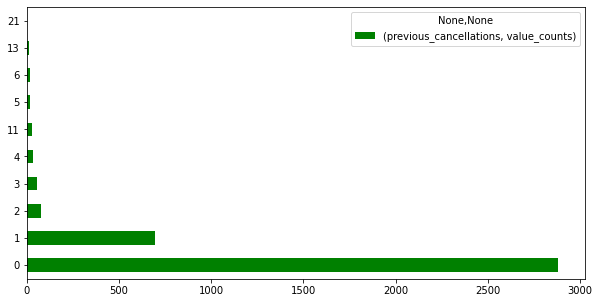

In [ ]:
df[["previous_cancellations"]][df["is_repeated_guest"] == "Yes"].agg(["value_counts"]).plot(kind = "barh",color='g');


**Find the Analysing Preference of guests, what they basically prefer ?**

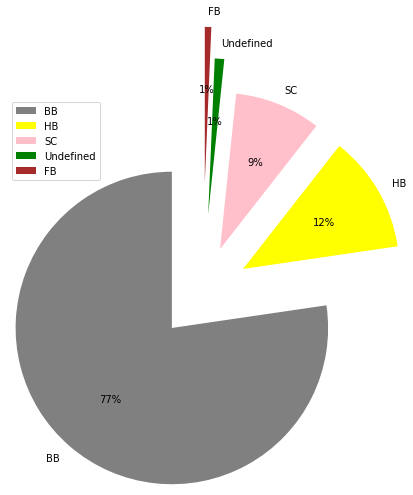

In [ ]:
meal = ["BB", "HB", "SC", "Undefined", "FB"]
values = df.meal.value_counts()

plt.figure(figsize = (7, 9))
plt.pie(values, labels = meal,explode = (0.3, 0.3, 0.3, 0.5, 0.7), autopct = "%.f%%",startangle=90,colors=['grey','yellow','pink','green','brown'])

plt.legend()

plt.show()

**Find The Analysys of Adults favorite and least favorite meal ?**

In [ ]:
df.iloc[np.where((df["adults"] > 0) & (df["meal"] != "Undefined"))]["meal"].agg(["value_counts"])

,value_counts
BB,92020
HB,14454
SC,10546
FB,798


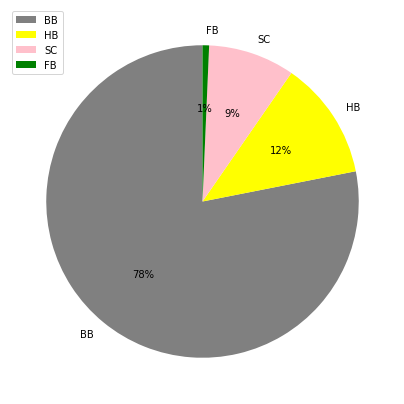

In [ ]:
meal = ["BB", "HB", "SC", "FB"]
values = [92020, 14454, 10546, 798]

plt.figure(figsize = (7, 9))
plt.pie(values, labels = meal, autopct = "%.f%%",startangle=90,colors=['grey','yellow','pink','green','brown'])


plt.legend()

plt.show();

### As we can see from pie chart, most adults prefer BB type of meal

**Find  The Babies favorite and least favorite meals ?**

In [ ]:
df.iloc[np.where((df["babies"] > 0) & (df["meal"] != "Undefined"))]["meal"].agg(["value_counts"])

,value_counts
BB,662
HB,178
SC,37
FB,24


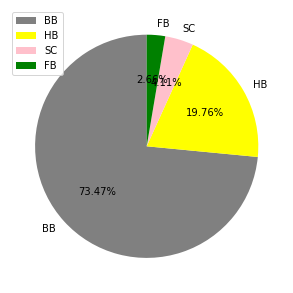

In [ ]:
meal = ["BB", "HB", "SC", "FB"]
values = [662, 178, 37, 24]

plt.figure(figsize = (5, 7))
plt.pie(values, labels = meal, autopct = "%.2f%%", startangle = 90,colors=['grey','yellow','pink','green','brown'])

plt.legend()

plt.show();

**Which is the  most busy year?**

In [ ]:
df.arrival_date_year.agg(["value_counts"])

,value_counts
2016,56707
2017,40687
2015,21996


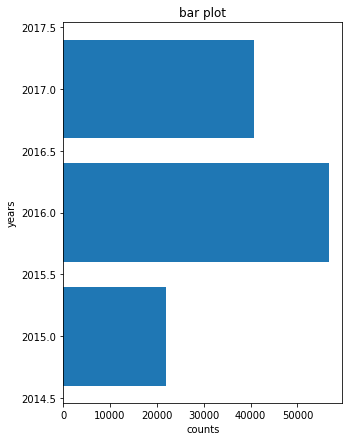

In [ ]:
year = [2016, 2017, 2015]
counts = df.arrival_date_year.value_counts()
plt.figure(figsize = (5, 7))
plt.barh(year,counts)
plt.title('bar plot')
plt.xlabel('counts')
plt.ylabel('years')
plt.show();

**What the Percentage distribution of required Car Parking Spaces ?**

Text(0.5, 1.0, '% Distribution of required car parking spaces')

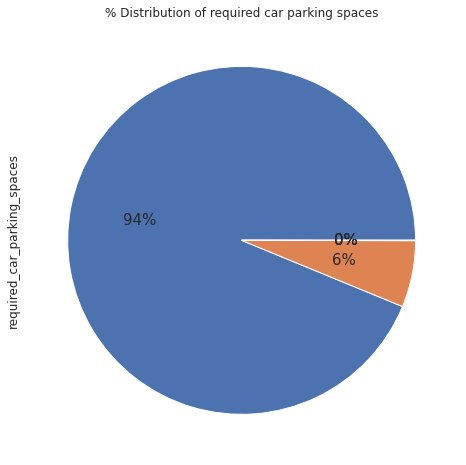

In [ ]:
df['required_car_parking_spaces'].value_counts().plot.pie( autopct='%.f%%',shadow=False , figsize=(12,8),fontsize=15,labels=None)

labels=df['required_car_parking_spaces'].value_counts().index
plt.title('% Distribution of required car parking spaces')


**How many guests arrived year-wise?**

In [ ]:
df.groupby(["hotel"])["arrival_date_year"].agg(["value_counts"])

value_counts
hotel        arrival_date_year              
City Hotel   2016                      38140
             2017                      27508
             2015                      13682
Resort Hotel 2016                      18567
             2017                      13179
             2015                       8314

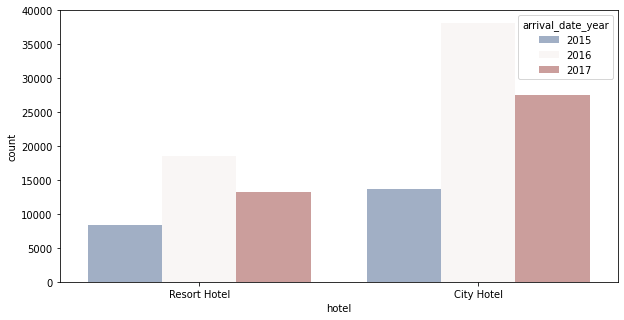

In [ ]:
sns.countplot(x = "hotel", hue = "arrival_date_year", data = df,palette='vlag', order = ["Resort Hotel", "City Hotel"]);

:**Which type of customers are more likely to cancel the booking?**

In [ ]:
df["customer_type"][df["is_canceled"] == "Yes"].agg(["value_counts"])

,value_counts
Transient,36514
Transient-Party,6389
Contract,1262
Group,59


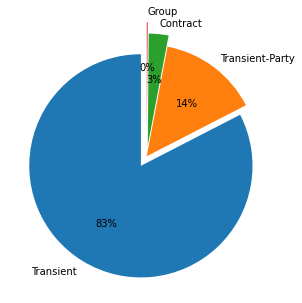

In [ ]:
customer = ["Transient", "Transient-Party", "Contract", "Group"]
cancel = [36514, 6389, 1262, 59]

plt.figure(figsize = (5, 7))
plt.pie(cancel, labels = customer, explode = (0.1, 0, 0.1, 0.2), autopct = "%.f%%", startangle = 90)

plt.show();

**classify the hotel deposit type & analysis**

In [ ]:
df.deposit_type.unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [ ]:
df.deposit_type.value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [ ]:
df["deposit_type"][df["is_canceled"] == "No"].agg(["value_counts"])

,value_counts
No Deposit,74947
Refundable,126
Non Refund,93


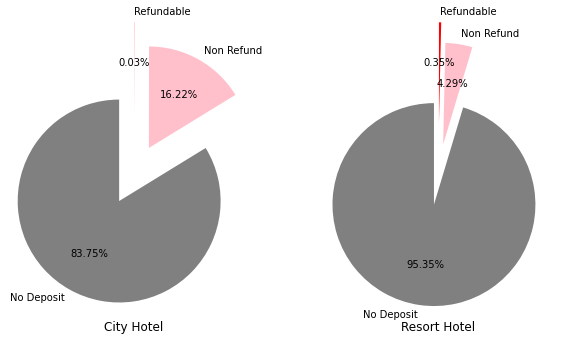

In [ ]:

deposit = ["No Deposit", "Non Refund", "Refundable"]
count1 = [66442, 12868, 20]
count2 = [38199, 1719, 142]

plt.figure(figsize = (10, 15))
plt.subplot(1, 2, 1)  
plt.pie(count1, labels = deposit, explode = (0.3, 0.3, 0.5), autopct = "%.2f%%", startangle = 90,colors=['grey','pink','red'])
plt.title("City Hotel",y= -0.14 )

plt.subplot(1, 2, 2)  
plt.pie(count2, labels = deposit, explode = (0.3, 0.3, 0.5), autopct = "%.2f%%", startangle = 90,colors=['grey','pink','red'])
plt.title("Resort Hotel",y= -0.14)

plt.show();

**What is the number of guest had not cancelled their bookings according to country ?**

In [ ]:
df[df["is_canceled"] =="No"]["country"].agg(["value_counts"])

,value_counts
PRT,21071
GBR,9676
FRA,8481
ESP,6391
DEU,6069
...,...
BHR,1
DJI,1
MLI,1
NPL,1


**From where the most guests coming?**

In [ ]:
df["country"].agg(["value_counts"])

,value_counts
PRT,48590
GBR,12129
FRA,10415
ESP,8568
DEU,7287
...,...
DJI,1
BWA,1
HND,1
VGB,1


In [ ]:
country_df=df['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'count of guests'})[:10]
country_df

,country,count of guests
0,PRT,48590
1,GBR,12129
2,FRA,10415
3,ESP,8568
4,DEU,7287
5,ITA,3766
6,IRL,3375
7,BEL,2342
8,BRA,2224
9,NLD,2104


Text(0.5, 1.0, 'Number of guests from diffrent Countries')

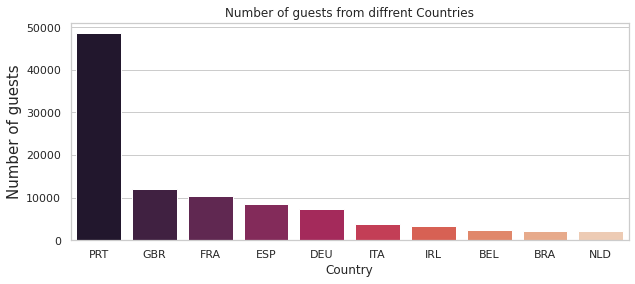

In [ ]:
country_df=df['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'count of guests'})[:10]

plt.figure(figsize=(10,4))
sns.set(style="whitegrid")
sns.barplot(x=country_df['country'],y=country_df['count of guests'],palette="rocket")
plt.xlabel('Country')
plt.ylabel('Number of guests',fontsize=15)
plt.title("Number of guests from diffrent Countries")

**Which is the Most preferred room type by the customers?**

Text(0.5, 1.0, 'Most preferred Room type')

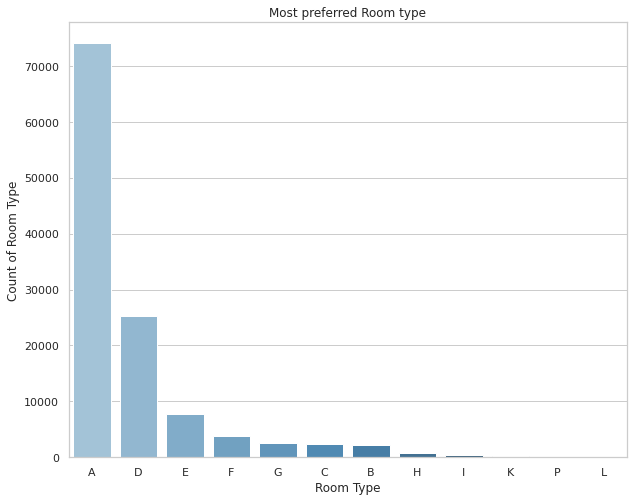

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['assigned_room_type'],order=df['assigned_room_type'].value_counts().index,palette=('Blues_d'))
plt.xlabel('Room Type')
plt.ylabel('Count of Room Type')
plt.title("Most preferred Room type")

**What is the Maximum number of stays in week nights in each hotel?**

In [ ]:
df.groupby(["hotel"])["stays_in_week_nights"].agg(["max"])

,max
hotel,
City Hotel,41
Resort Hotel,50


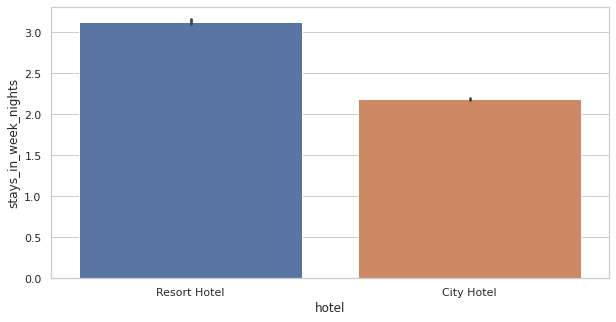

In [ ]:
sns.barplot(x = "hotel", y = "stays_in_week_nights", data = df);

**Maximum number of stays in weekend nights in each hotel?**

In [ ]:
df.groupby(["hotel"])["stays_in_weekend_nights"].agg(["max"])

,max
hotel,
City Hotel,16
Resort Hotel,19


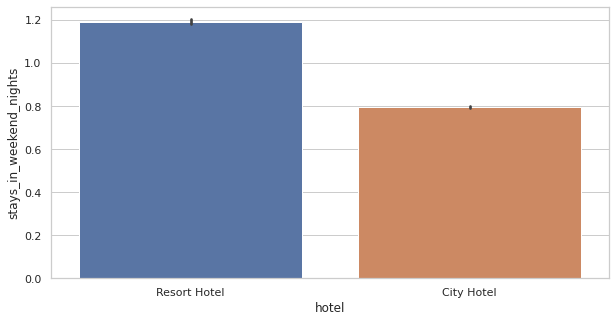

In [ ]:
sns.barplot(x = "hotel", y = "stays_in_weekend_nights", data = df);

**From where most of the bookings were made?**

In [ ]:
df.groupby(["hotel"])["market_segment"].agg(["value_counts"])

value_counts
hotel        market_segment              
City Hotel   Online TA              38748
             Offline TA/TO          16747
             Groups                 13975
             Direct                  6093
             Corporate               2986
             Complementary            542
             Aviation                 237
             Undefined                  2
Resort Hotel Online TA              17729
             Offline TA/TO           7472
             Direct                  6513
             Groups                  5836
             Corporate               2309
             Complementary            201

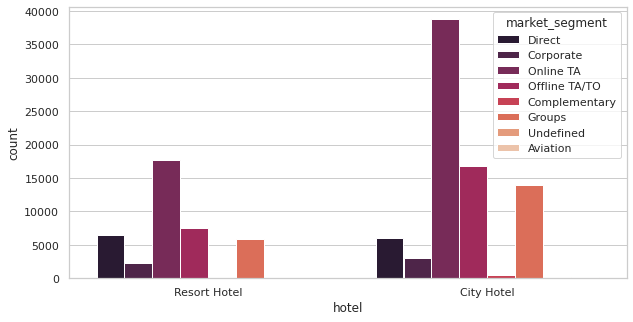

In [ ]:
sns.countplot(x = "hotel", hue = "market_segment",palette='rocket', data = df);

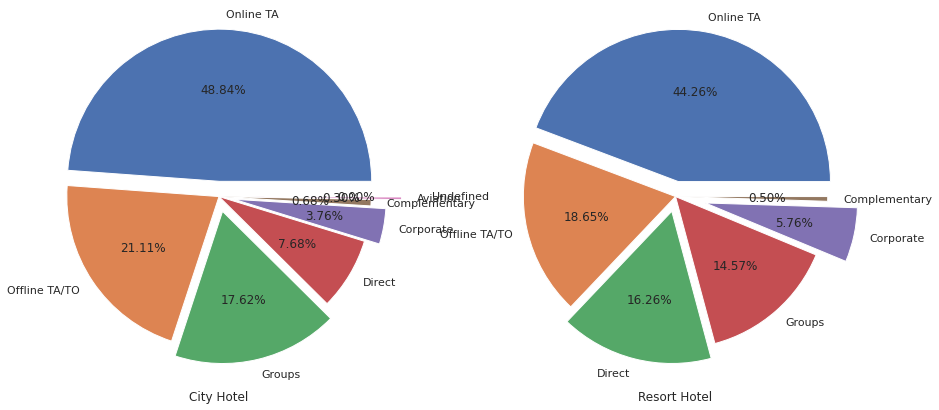

In [ ]:
city_hotel = ["Online TA", "Offline TA/TO", "Groups", "Direct", "Corporate", "Complementary", "Aviation", "Undefined"]
count1 = [38748, 16747, 13975, 6093, 2986, 542, 237, 2]

resort_hotel = ["Online TA", "Offline TA/TO", "Direct", "Groups",  "Corporate", "Complementary"]
count2 = [17729, 7472, 6513, 5836, 2309, 201]

plt.figure(figsize = (15, 25))
plt.subplot(1, 2, 1)  
plt.pie(count1, labels = city_hotel, explode = (0.1, 0, 0.1, 0, 0.1, 0, 0.2, 0.3), autopct = "%.2f%%", )
plt.title("City Hotel", y = -0.05)

plt.subplot(1, 2, 2)  
plt.pie(count2, labels = resort_hotel, explode = (0.1, 0, 0.1, 0, 0.2, 0), autopct = "%.2f%%", )
plt.title("Resort Hotel", y = -0.05)

plt.show();

**What is The reservation status per year in each hotel**

In [ ]:
df.groupby(["hotel", "arrival_date_year"])["reservation_status"].agg(["value_counts"])

value_counts
hotel        arrival_date_year reservation_status              
City Hotel   2015              Check-Out                   7678
                               Canceled                    5882
                               No-Show                      122
             2016              Check-Out                  22733
                               Canceled                   14852
                               No-Show                      555
             2017              Check-Out                  15817
                               Canceled                   11452
                               No-Show                      239
Resort Hotel 2015              Check-Out                   6176
                               Canceled                    2069
                               No-Show                       69
             2016              Check-Out                  13637
                               Canceled                    4817
                               No-Show                      113
             2017              Check-Out                   9125
                               Canceled                    3945
                               No-Show                      109

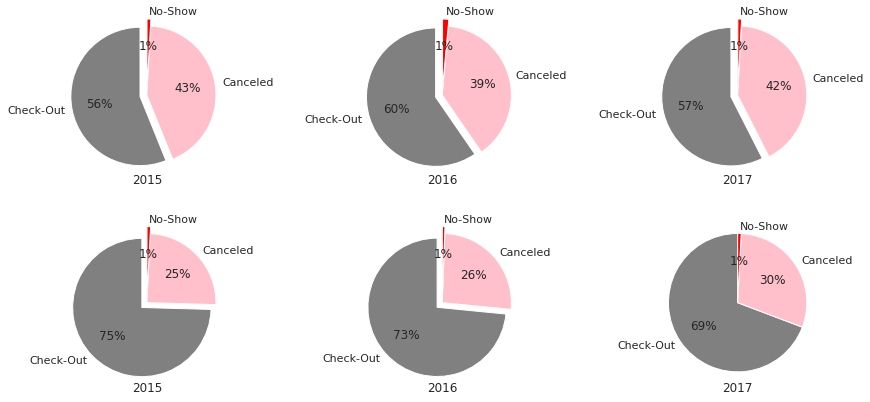

In [ ]:
status = ["Check-Out", "Canceled", "No-Show"]
count1 = [7678, 5882, 122]
count2 = [22733, 14852, 555]
count3 = [15817, 11452, 239]
count4 = [6176, 2039, 69]
count5 = [13637, 4817, 113]
count6 = [9125, 3945, 109]

plt.figure(figsize = (15, 7))
plt.subplot(2, 3, 1)  
plt.pie(count1, labels = status, explode = (0.1, 0, 0.1), autopct = "%.f%%",colors=['grey','pink','red'], startangle = 90)
plt.title("2015", y = -0.05)

plt.subplot(2, 3, 2)  
plt.pie(count2, labels = status, explode = (0.1, 0, 0.1), autopct = "%.f%%",colors=['grey','pink','red'], startangle = 90)
plt.title("2016", y = -0.05)

plt.subplot(2, 3, 3)  
plt.pie(count3, labels = status, explode = (0.1, 0, 0.1), autopct = "%.f%%",colors=['grey','pink','red'], startangle = 90)
plt.title("2017", y = -0.05)

plt.subplot(2, 3, 4)  
plt.pie(count4, labels = status, explode = (0.1, 0, 0.1), autopct = "%.f%%",colors=['grey','pink','red'], startangle = 90)
plt.title("2015", y = -0.05)

plt.subplot(2, 3, 5)  
plt.pie(count5, labels = status, explode = (0.1, 0, 0.1), autopct = "%.f%%",colors=['grey','pink','red'], startangle = 90)
plt.title("2016", y = -0.05)

plt.subplot(2, 3, 6)  
plt.pie(count6, labels = status,  autopct = "%.f%%", colors=['grey','pink','red'],startangle = 90)
plt.title("2017", y = -0.05)

plt.show();

***Reservation Status***

In [ ]:
print (df.reservation_status.unique())

['Check-Out' 'Canceled' 'No-Show']


**Most Check-Out dates in 2015, 2016, 2017**


In [ ]:
df.iloc[np.where((df["reservation_status"] == "Check-Out") & (df["arrival_date_year"] == 2015))][["arrival_date_year", "reservation_status", "reservation_status_date"]].value_counts().idxmax()

(2015, 'Check-Out', '2015-12-08')

In [ ]:
df.iloc[np.where((df["reservation_status"] == "Check-Out") & (df["arrival_date_year"] == 2016))][["arrival_date_year", "reservation_status", "reservation_status_date"]].value_counts().idxmax()

(2016, 'Check-Out', '2016-06-26')

In [ ]:
df.iloc[np.where((df["reservation_status"] == "Check-Out") & (df["arrival_date_year"] == 2017))][["arrival_date_year", "reservation_status", "reservation_status_date"]].value_counts().idxmax()

(2017, 'Check-Out', '2017-01-19')

**Most cancelled dates in 2015, 2016, 2017**

In [ ]:
df.iloc[np.where((df["reservation_status"] == "Canceled") & (df["arrival_date_year"] == 2015))][["arrival_date_year", "reservation_status", "reservation_status_date"]].value_counts().idxmax()

(2015, 'Canceled', '2015-07-06')

In [ ]:
df.iloc[np.where((df["reservation_status"] == "Canceled") & (df["arrival_date_year"] == 2016))][["arrival_date_year", "reservation_status", "reservation_status_date"]].value_counts().idxmax()

(2016, 'Canceled', '2015-10-21')

In [ ]:
df.iloc[np.where((df["reservation_status"] == "Canceled") & (df["arrival_date_year"] == 2017))][["arrival_date_year", "reservation_status", "reservation_status_date"]].value_counts().idxmax()

(2017, 'Canceled', '2016-11-25')

**Most No-Show dates in 2015, 2016, 2017**


In [ ]:
df.iloc[np.where((df["reservation_status"] == "No-Show") & (df["arrival_date_year"] == 2015))][["arrival_date_year", "reservation_status", "reservation_status_date"]].value_counts().idxmax()


(2015, 'No-Show', '2015-12-25')

In [ ]:
df.iloc[np.where((df["reservation_status"] == "No-Show") & (df["arrival_date_year"] == 2016))][["arrival_date_year", "reservation_status", "reservation_status_date"]].value_counts().idxmax()

(2016, 'No-Show', '2016-02-28')

In [ ]:
df.iloc[np.where((df["reservation_status"] == "No-Show") & (df["arrival_date_year"] == 2017))][["arrival_date_year", "reservation_status", "reservation_status_date"]].value_counts().idxmax()

(2017, 'No-Show', '2017-02-25')

**What is the Average daily rate (ADR), across distribution channel ?**

Text(0.5, 1.0, 'ADR across Distribution channel')

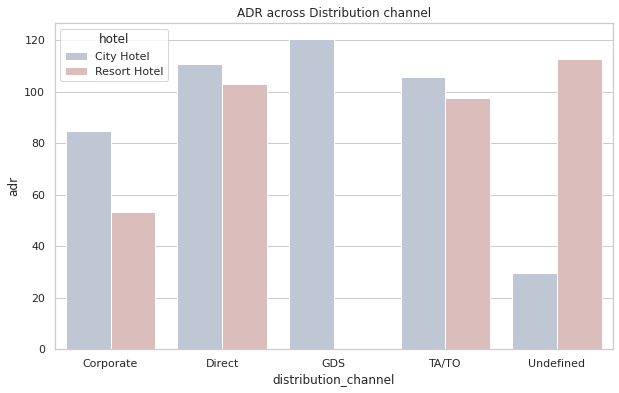

In [ ]:
distribution_channel_df=df.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='distribution_channel', y='adr', data=distribution_channel_df, hue='hotel',palette="vlag")
plt.title('ADR across Distribution channel')

# ***Conclusion***

* City Hotels are comparatively more busy.
* Resort hotels have more repeated guests.
* Average lead time for resort hotel is high.
* Cancellation rate is high for City hotel.
* Most of the bookings for City hotels and Resort hotel were happened in 2016.
* Most of the bookings were made through TA/TO (Travelling Agency)
* most number of check outs happened for both Resort and city hotels were in 2016
* Most number of No shows happened for both Resort and city hotels were in 2016

